### 데이터 전처리 실습 1번
- 타이타닉 생존 예측

In [ ]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv')# 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 시험지 파일
submission = pd.read_csv('submission.csv') #답안지 파일 
display(train)
display(test)
submission

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import seaborn as sns
from io import StringIO
import missingno as msno
import matplotlib.pyplot as plt

- 결측치 확인

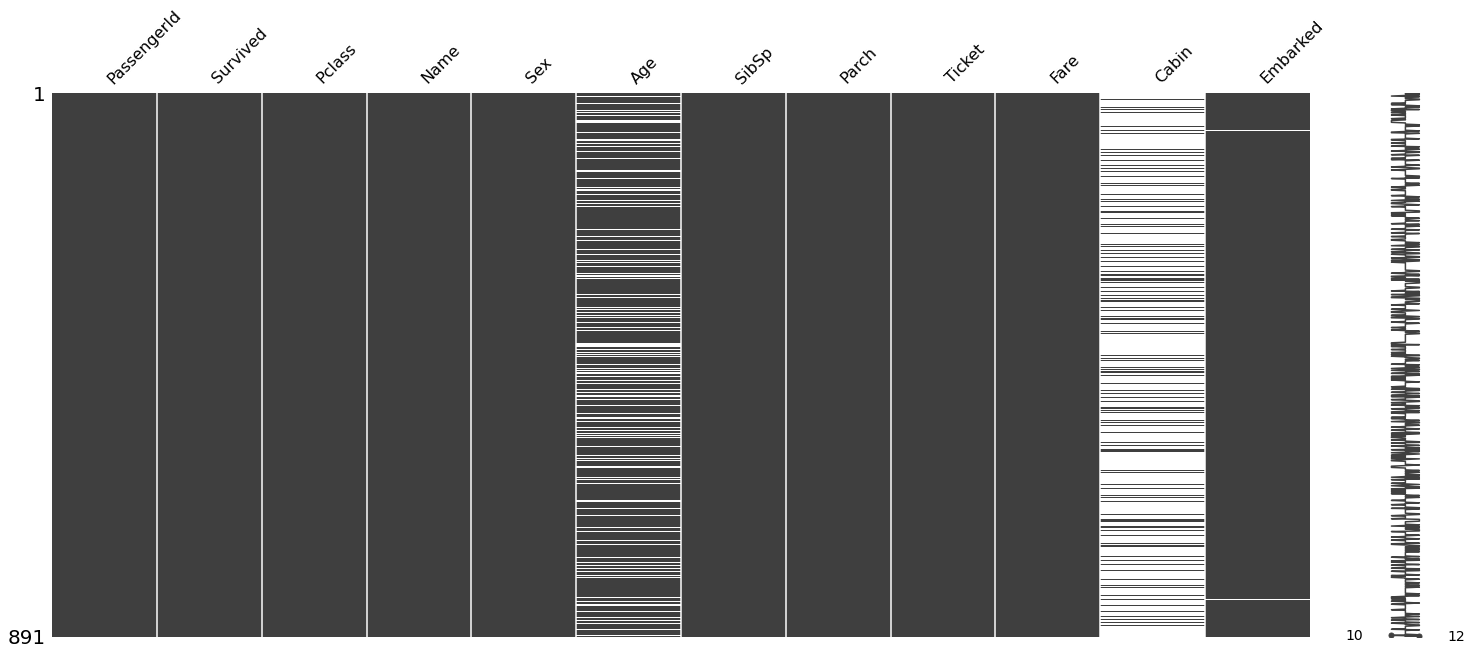

In [ ]:
msno.matrix(train)

### train 데이터 전처리

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
titanic = train.copy()  #원본 데이터 보호
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

display(titanic['Age'])
print()
print("나이 데이터의 결측치 갯수")
titanic['Age'].isna().sum() #나이 데이터에 NaN 사라짐

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


나이 데이터의 결측치 갯수


0

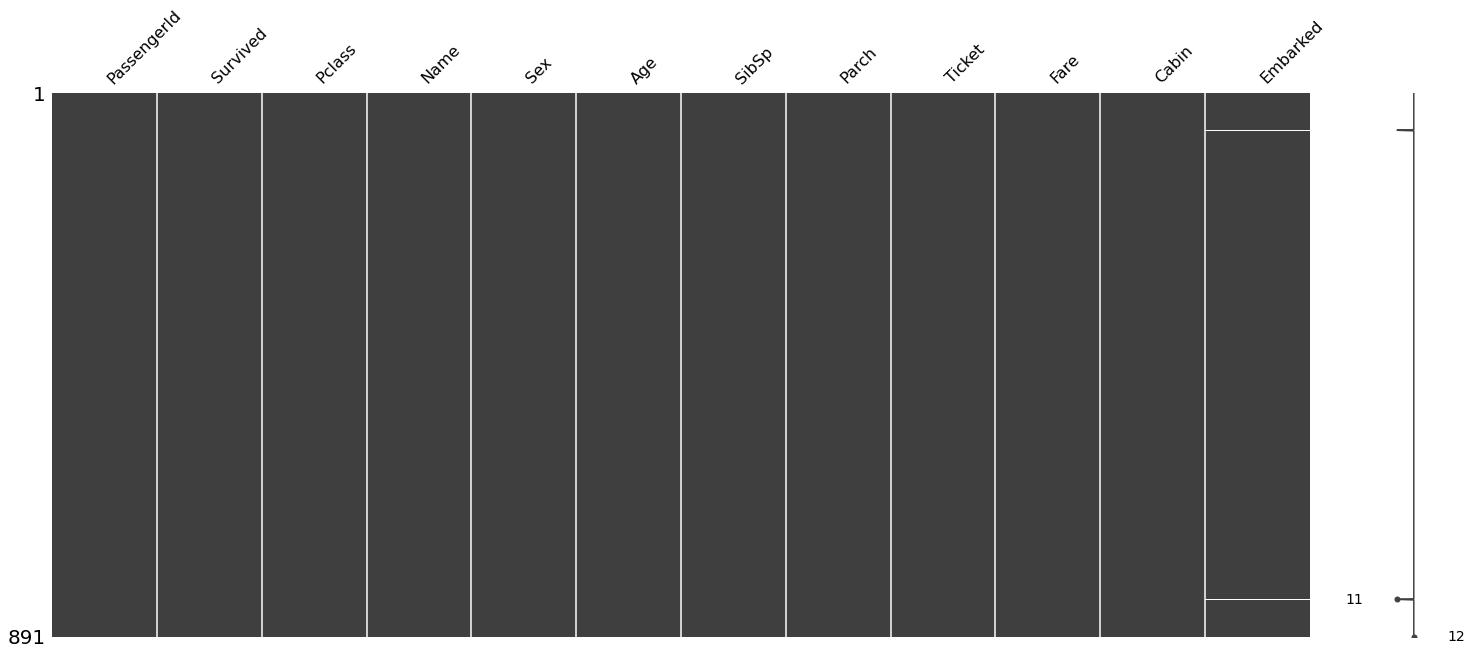

In [ ]:
titanic['Cabin'] = titanic['Cabin'].fillna('N')
msno.matrix(titanic)
#대신 나이는 숫자였으므로 평균을 넣었지만, 데크는 문자열이므로 fillna를 사용합니다.

In [ ]:
#Cabin에서 앞 첫 글자 이외의 글자 제거 함수 선언
def del_data(dataframe, column):
    list_data = []
    titanic_feature_test = dataframe[column].astype(str)
#     print(titanic_feature_test)
    for idx, value in enumerate(titanic_feature_test):
        list_data.append(value[0])
    df = pd.DataFrame(list_data, columns=[column])
    return list_data, df

In [ ]:
#함수 실행 후 확인
list_data, df = del_data(titanic, 'Cabin')
print(list_data)
print(type(list_data))
df

['N', 'C', 'N', 'C', 'N', 'N', 'E', 'N', 'N', 'N', 'G', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'D', 'N', 'A', 'N', 'N', 'N', 'C', 'N', 'N', 'N', 'B', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'D', 'N', 'B', 'C', 'N', 'N', 'N', 'N', 'N', 'B', 'C', 'N', 'N', 'N', 'F', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'F', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'C', 'N', 'N', 'N', 'E', 'N', 'N', 'N', 'A', 'D', 'N', 'N', 'N', 'N', 'D', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'B', 'N', 'N', 'N', 'N', 'E', 'D', 'N', 'N', 'N', 'F', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'D', 'C', 'N', 'B', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'F', 'N', 'N', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'N', 'N', 'N', 'B', 'N', 'N', 'N', 'A', 'N', 'N', 'C', 'N', 'N', 'N', 'N', 'N', 'F', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'F', 'B', 'B', 'N', 'N', 'N', 'N',

,Cabin
0,N
1,C
2,N
3,C
4,N
...,...
886,N
887,B
888,N
889,C


In [ ]:
#처리된 Cabin 데이터 삽입
titanic['Cabin'] = list_data
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


### 그래프 그려보기

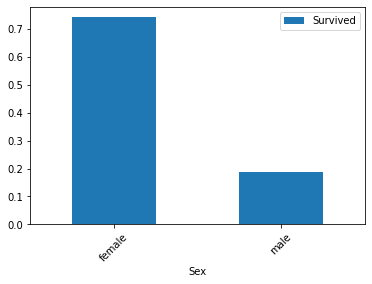

In [ ]:
titanic[['Sex', 'Survived']].groupby('Sex').mean().plot(kind = "bar", rot = 45)

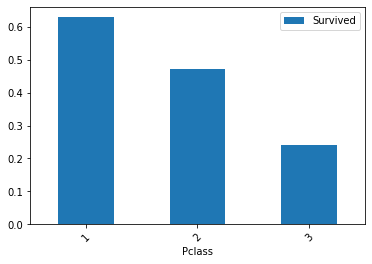

In [ ]:
titanic[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = "bar", rot = 45)

In [ ]:
#테스트 데이터 결측치 처리
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
test_before = test.copy()  #원본 데이터 보호
test_before['Age'] = imputer.fit_transform(test_before[['Age']])

display(test_before['Age'])
print()
print("나이 데이터의 결측치 갯수")
print(test_before['Age'].isna().sum())

test_before['Cabin'] = test_before['Cabin'].fillna('N')


#Cabin에서 앞 첫 글자 이외의 글자 제거 함수 선언
def del_data(dataframe, column):
    list_data = []
    titanic_feature_test = dataframe[column].astype(str)
#     print(titanic_feature_test)
    for idx, value in enumerate(titanic_feature_test):
        list_data.append(value[0])
    df = pd.DataFrame(list_data, columns=[column])
    return list_data, df


#함수 실행 후 확인
list_data, df = del_data(test_before, 'Cabin')

#처리된 Cabin 데이터 삽입
test_before['Cabin'] = list_data
test_before

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64


나이 데이터의 결측치 갯수
0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,N,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,N,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,N,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,N,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,N,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,N,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,N,S


In [ ]:
#데이터 나누기
X_train = titanic.copy()
y_train = titanic['Survived']
X_test = test_before.copy()

#필요 없는 데이터 제거
X_train.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis=1, inplace=True)

display(X_train)
X_test

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.000000,1,0,N,S
1,1,female,38.000000,1,0,C,C
2,3,female,26.000000,0,0,N,S
3,1,female,35.000000,1,0,C,S
4,3,male,35.000000,0,0,N,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,N,S
887,1,female,19.000000,0,0,B,S
888,3,female,29.699118,1,2,N,S
889,1,male,26.000000,0,0,C,C


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.50000,0,0,N,Q
1,3,female,47.00000,1,0,N,S
2,2,male,62.00000,0,0,N,Q
3,3,male,27.00000,0,0,N,S
4,3,female,22.00000,1,1,N,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,N,S
414,1,female,39.00000,0,0,C,C
415,3,male,38.50000,0,0,N,S
416,3,male,30.27259,0,0,N,S


- 레이블 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

def label_encoder(dataframe_list, columns_list):
    for dataframe in dataframe_list:
        for columns in columns_list:
            encoder = LabelEncoder()
            dataframe[columns] = encoder.fit_transform(dataframe[columns])
    return dataframe

In [ ]:
encoder_train = label_encoder([X_train, X_test], ['Sex', 'Cabin', 'Embarked'])
print(encoder_train)

     Pclass  Sex       Age  SibSp  Parch  Cabin  Embarked
0         3    1  34.50000      0      0      7         1
1         3    0  47.00000      1      0      7         2
2         2    1  62.00000      0      0      7         1
3         3    1  27.00000      0      0      7         2
4         3    0  22.00000      1      1      7         2
..      ...  ...       ...    ...    ...    ...       ...
413       3    1  30.27259      0      0      7         2
414       1    0  39.00000      0      0      2         0
415       3    1  38.50000      0      0      7         2
416       3    1  30.27259      0      0      7         2
417       3    1  30.27259      1      1      7         0

[418 rows x 7 columns]


In [ ]:
display(X_train)
display(X_test)

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,1,22.000000,1,0,7,2
1,1,0,38.000000,1,0,2,0
2,3,0,26.000000,0,0,7,2
3,1,0,35.000000,1,0,2,2
4,3,1,35.000000,0,0,7,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,7,2
887,1,0,19.000000,0,0,1,2
888,3,0,29.699118,1,2,7,2
889,1,1,26.000000,0,0,2,0


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,1,34.50000,0,0,7,1
1,3,0,47.00000,1,0,7,2
2,2,1,62.00000,0,0,7,1
3,3,1,27.00000,0,0,7,2
4,3,0,22.00000,1,1,7,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,7,2
414,1,0,39.00000,0,0,2,0
415,3,1,38.50000,0,0,7,2
416,3,1,30.27259,0,0,7,2


- test 데이터도 결측치 처리 및 레이블 인코딩

In [ ]:
# X_train1 = X_train.copy()
# X_test1 = X_test.copy()

# # ['Sex', 'Cabin', 'Embarked']
# encoder = LabelEncoder()
# X_train1['Sex'] = encoder.fit_transform(X_train1['Sex'])
# X_train1['Cabin'] = encoder.fit_transform(X_train1['Cabin'])
# X_train1['Embarked'] = encoder.fit_transform(X_train1['Embarked'])

# test_before['Sex'] = encoder.fit_transform(test_before['Sex'])
# test_before['Cabin'] = encoder.fit_transform(test_before['Cabin'])
# test_before['Embarked'] = encoder.fit_transform(test_before['Embarked'])

# display(X_train1)
# display(test_before)

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,1,22.000000,1,0,7,2
1,1,0,38.000000,1,0,2,0
2,3,0,26.000000,0,0,7,2
3,1,0,35.000000,1,0,2,2
4,3,1,35.000000,0,0,7,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,7,2
887,1,0,19.000000,0,0,1,2
888,3,0,29.699118,1,2,7,2
889,1,1,26.000000,0,0,2,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,7,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,7,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,7,1
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,7,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,7,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,7,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,2,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,7,2
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,7,2


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# 답안지 만들기
submission['Survived'] = y_pred
submission.to_csv('lr_model_Pclass_Age.csv', index = False)

### DecisionTreeClassifier

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_train,
#                                                    y_train,
#                                                    test_size = 0.469,
#                                                    shuffle = True,
#                                                    random_state = 200)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
submission['Survived'] = dt_model.predict(X_test)
submission.to_csv('dt_model.csv', index = False)

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### 모델 예측

In [ ]:
submission['Survived'] = model.predict_proba(X_test)[:,1]
submission.to_csv('lr_proba.csv', index = False)
submission

,PassengerId,Survived
0,892,0.098714
1,893,0.358135
2,894,0.085062
3,895,0.106697
4,896,0.581123
...,...,...
413,1305,0.094949
414,1306,0.945810
415,1307,0.070386
416,1308,0.094949


In [ ]:
submission['Survived'] = dt_model.predict_proba(X_test)[:,1]
submission.to_csv('dt_proba.csv', index = False)
submission

,PassengerId,Survived
0,892,0.00
1,893,0.00
2,894,1.00
3,895,0.75
4,896,1.00
...,...,...
413,1305,0.00
414,1306,1.00
415,1307,0.00
416,1308,0.00


In [ ]:
DecisionTreeClassifier()
dt_model_new = DecisionTreeClassifier(min_samples_split=10)
dt_model_new.fit(X_train, y_train)
submission['Survived'] = dt_model_new.predict_proba(X_test)[:, 1]
submission.to_csv('dt_min_samples_10_proba.csv', index = False)
submission

,PassengerId,Survived
0,892,0.000000
1,893,0.000000
2,894,0.166667
3,895,0.750000
4,896,1.000000
...,...,...
413,1305,0.166667
414,1306,1.000000
415,1307,0.000000
416,1308,0.166667


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [ ]:
y_true = y_train.values
print(accuracy_score(y_true, y_pred))
precision_score(y_true, y_pred)

0.7934904601571269


0.7393939393939394

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [ ]:
model_10 = DecisionTreeClassifier(min_samples_split=10)
model_20 = DecisionTreeClassifier(min_samples_split=20)
model_30 = DecisionTreeClassifier(min_samples_split=30)

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

score_10 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_10.fit(X_trn, y_trn)
    
    y_pred = model_10.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))
print()
score_10

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료



[0.8563551144196304,
 0.7819264069264069,
 0.8414570230607966,
 0.7817460317460317,
 0.837395178197065]

In [ ]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))
print()
print(score_20)

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료

[0.8806175902950097, 0.8037743506493507, 0.8469601677148846, 0.7884259259259259, 0.8647798742138364]


In [ ]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))
print()
print(score_30)

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료

[0.8852357320099256, 0.843547077922078, 0.8543632075471699, 0.79265873015873, 0.8703485324947589]


In [ ]:
import numpy as np
np.mean(score_10), np.mean(score_20), np.mean(score_30)

(0.819775950869986, 0.8369115817598015, 0.8492306560265324)

- 참고 사이트
https://dacon.io/competitions/open/235539/codeshare/1534?page=1&dtype=vote